In [1]:
from pymongo import MongoClient
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.parallel import Client
import itertools
#from numbapro import jit


%matplotlib inline

In [2]:
client = MongoClient()
db = client.VentDyssynchrony_db
val_data = db.ValidatedData_collection


In [3]:
#ipclient = Client()
#print (ipclient.ids)
#ipview = ipclient[:]
#ipview = ipclient.load_balanced_view()

In [4]:
patients = val_data.distinct('patientID')
print(patients)

['P101', 'P102', 'P103', 'P105', 'P107', 'P109', 'P108', 'P106', 'P100']


In [5]:
def unpack(breath):
    unpack_col = ['characteristics', 'data_frame']

    for col in unpack_col:      
        key_names = set()
        
        keys = breath[col].apply(lambda x: set(x.keys()))
        
        for items in keys:
            key_names.update(items)

        for key in key_names:
            breath[col +':'+ key] = breath[col].apply(lambda x: x[key] if key in x else np.nan)

        breath.drop(col, inplace=True, axis=1)
    
    return breath

In [6]:
results = val_data.find()
breath_df = pd.DataFrame(list(results))
breath_df = unpack(breath_df)
breath_df['analysis'] = breath_df['analysis'].apply(lambda x: x['validation'] if isinstance(x, dict) else [])
breath_df.drop(['_id', 'file_name', 'data_frame:DateTime', 'location'], inplace=True, axis=1)
    
del results

In [7]:
breath_df.columns

Index(['analysis', 'breath_number', 'end_time', 'patientID', 'start_time', 'vent_settings', 'characteristics:end_insp_vol', 'characteristics:min_pressure', 'characteristics:max_pressure', 'characteristics:max_vol', 'characteristics:max_flow', 'characteristics:peak_pressure', 'characteristics:breath_time', 'characteristics:min_flow', 'characteristics:min_exp_flow', 'characteristics:peak_insp_flow', 'characteristics:exp_time', 'characteristics:insp_time', 'characteristics:min_vol', 'data_frame:Flow', 'data_frame:Volume', 'data_frame:Status', 'data_frame:Time', 'data_frame:Paw'], dtype='object')

In [8]:
breath_df.sort(['patientID', 'start_time'], inplace=True)

In [9]:
breath_df.head()

,analysis,breath_number,end_time,patientID,start_time,vent_settings,characteristics:end_insp_vol,characteristics:min_pressure,characteristics:max_pressure,characteristics:max_vol,...,characteristics:min_exp_flow,characteristics:peak_insp_flow,characteristics:exp_time,characteristics:insp_time,characteristics:min_vol,data_frame:Flow,data_frame:Volume,data_frame:Status,data_frame:Time,data_frame:Paw
542,[i],1,2014-04-21 17:36:59,P100,2014-04-21 17:36:55,{'reference_doc': 'P100\Vent0\2014-04-21 17:36...,-7.5,"[[20.300000000000001, '0 days 00:00:02.848000'...","[[22.399999999999999, '0 days 00:00:02.624000'...",502.5,...,49.20,4.20,2.624,1.280,-7.5,"[0.0, 6.9, 20.7, 34.8, 41.85, 48.9, 49.2, 48.6...","[0.0, 2.5, 10.0, 27.5, 47.5, 80.0, 95.0, 120.0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1856000000, 1888000000, 1920000000, 195200000...","[4.6, 5.8, 6.8, 10.3, 13.4, 16.4, 17.3, 17.8, ..."
1738,[],2,2014-04-21 17:37:02,P100,2014-04-21 17:36:59,{'reference_doc': 'P100\Vent2\2014-04-21 17:37...,-5.0,"[[4.7000000000000002, '0 days 00:00:05.824000'...","[[5.5999999999999996, '0 days 00:00:08.160000'...",490.0,...,50.25,3.75,2.496,1.120,-5.0,"[-1.95, -0.9, 16.5, 24.0, 36.15, 46.5, 49.05, ...","[0.0, 0.0, 5.0, 12.5, 32.5, 62.5, 77.5, 102.5,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[5792000000, 5824000000, 5856000000, 588800000...","[4.8, 4.7, 6.5, 7.6, 11.5, 14.9, 16.1, 17.2, 1..."
0,"[d, f]",130,2014-04-22 18:43:03,P101,2014-04-22 18:43:02,{'reference_doc': 'P101\Vent110\2014-04-22 18:...,402.5,"[[18.600000000000001, '0 days 00:04:56.468000'...","[[19.399999999999999, '0 days 00:04:56.628000'...",445.0,...,46.20,46.50,0.224,0.768,-2.5,"[-3.45, -1.5, 1.8, 11.7, 24.15, 28.05, 30.6, 3...","[0.0, -2.5, -2.5, 2.5, 15.0, 22.5, 37.5, 50.0,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[295892000000, 295924000000, 295956000000, 295...","[10.2, 10.7, 11.0, 11.9, 14.6, 15.9, 17.2, 18...."
1199,[],131,2014-04-22 18:43:05,P101,2014-04-22 18:43:03,{'reference_doc': 'P101\Vent110\2014-04-22 18:...,-500.0,"[[4.0, '0 days 00:04:56.948000', 1], [10.6, '0...","[[25.399999999999999, '0 days 00:04:57.524000'...",175.0,...,40.65,-2.10,2.240,0.576,-500.0,"[4.8, 2.55, 9.3, 31.35, 40.05, 40.65, 33.75, 2...","[0.0, 5.0, 5.0, 22.5, 45.0, 72.5, 102.5, 120.0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[296916000000, 296948000000, 296980000000, 297...","[4.5, 4.0, 5.7, 10.3, 15.4, 19.2, 22.0, 23.1, ..."
1,"[d, f]",177,2014-04-22 18:44:52,P101,2014-04-22 18:44:51,{'reference_doc': 'P101\Vent153\2014-04-22 18:...,405.0,"[[20.899999999999999, '0 days 00:06:46.036000'...","[[23.0, '0 days 00:06:45.780000', 12], [21.300...",420.0,...,42.00,40.50,0.448,0.736,-5.0,"[-7.5, 0.0, 3.45, 16.5, 23.7, 31.35, 35.7, 38....","[-5.0, -5.0, -5.0, 2.5, 10.0, 27.5, 45.0, 57.5...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[405396000000, 405428000000, 405460000000, 405...","[10.6, 11.5, 12.0, 13.4, 14.5, 17.3, 19.1, 20...."


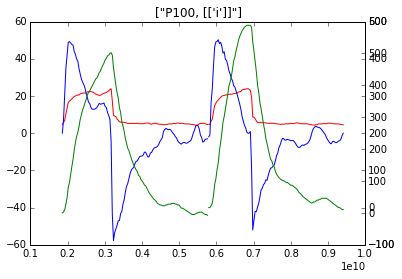

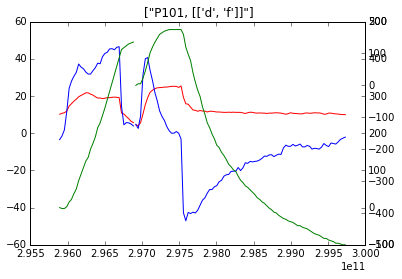

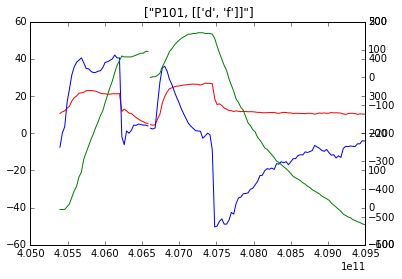

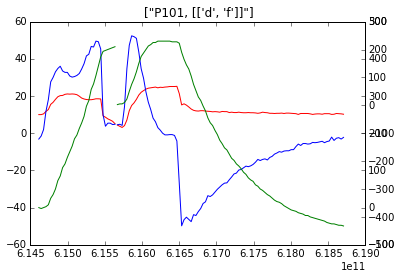

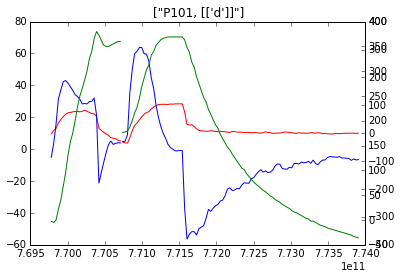

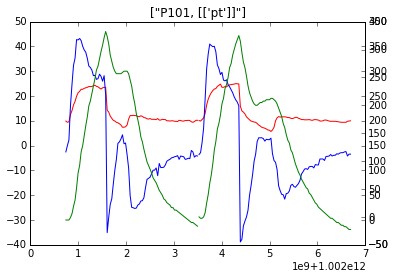

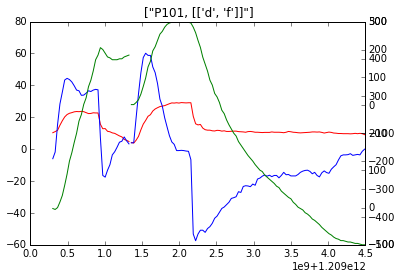

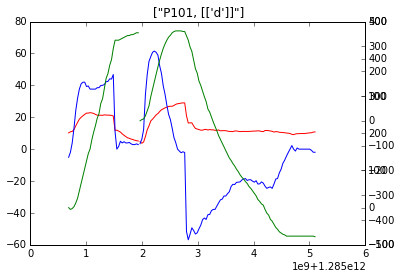

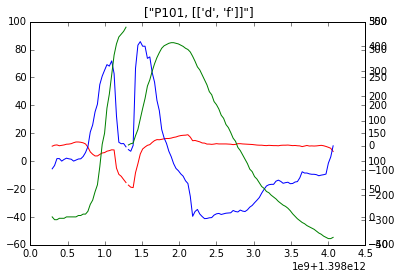

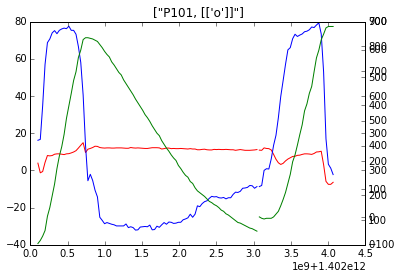

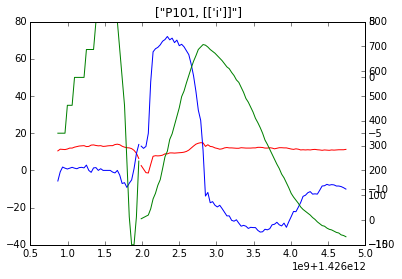

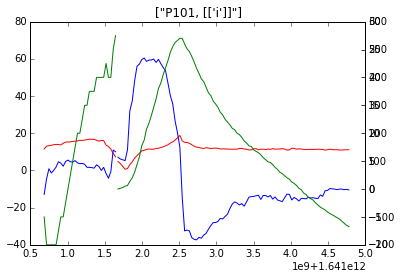

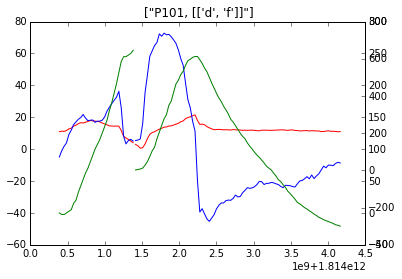

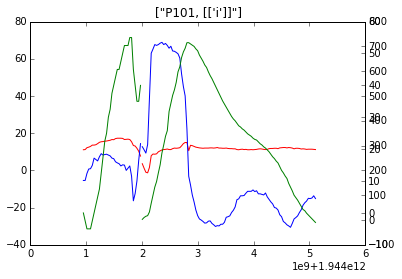

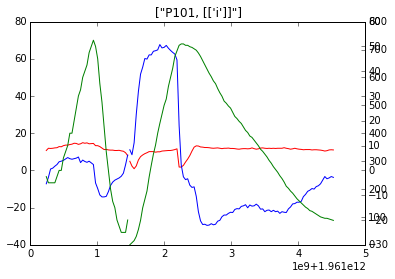

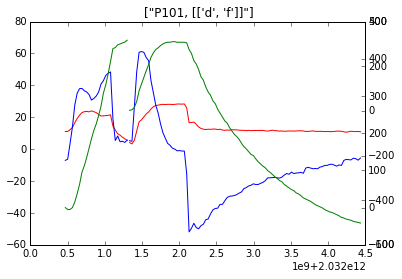

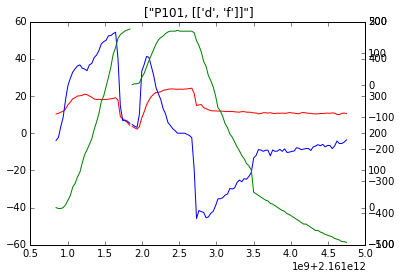

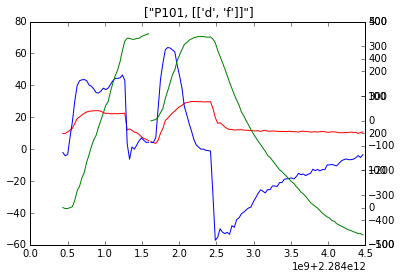

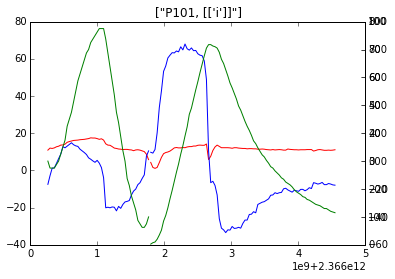

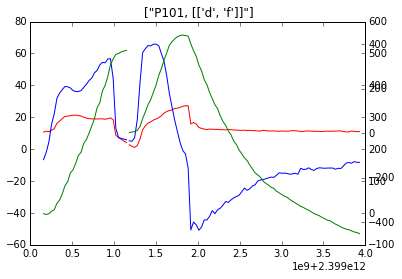

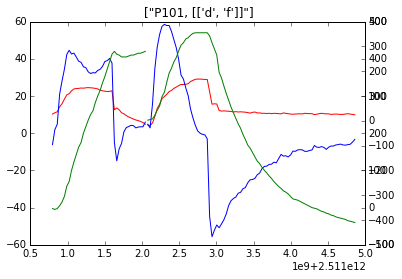

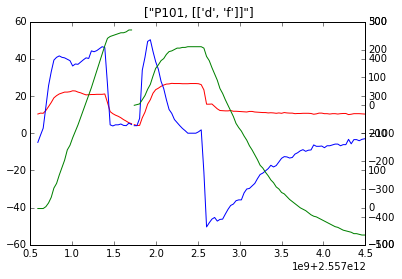

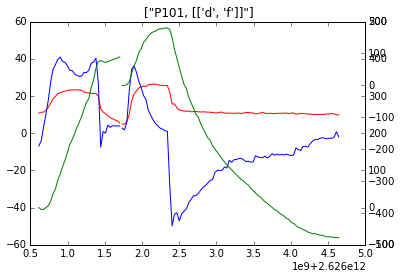

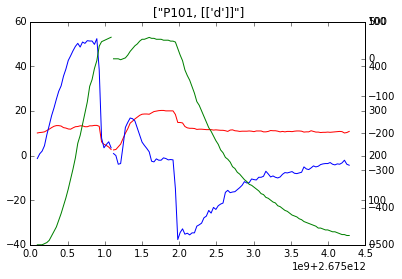

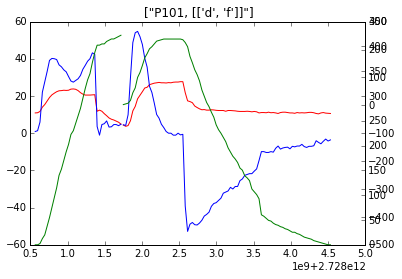

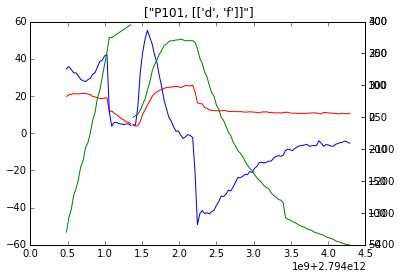

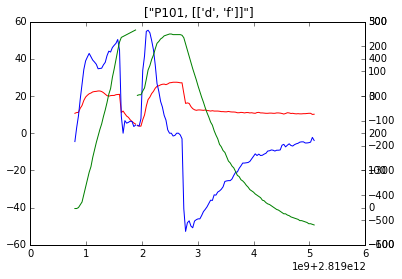

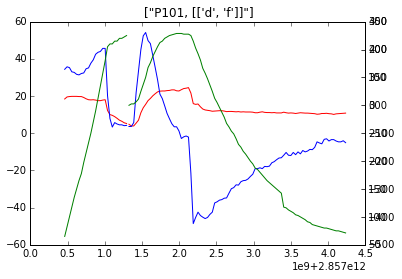

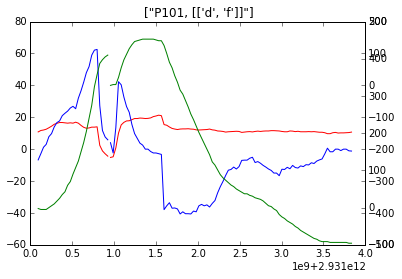

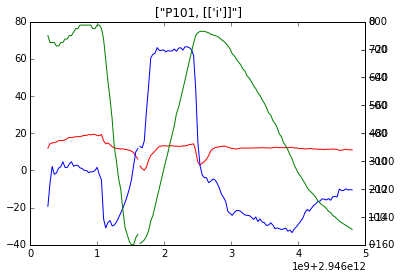

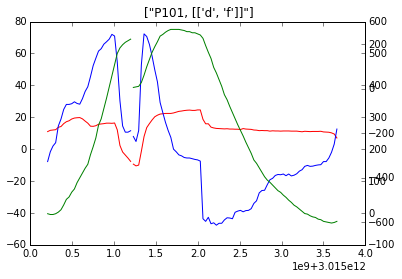

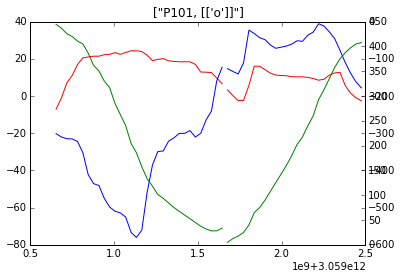

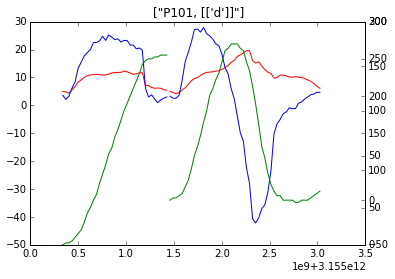

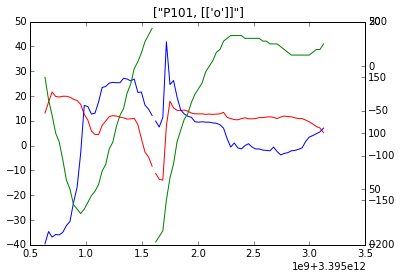

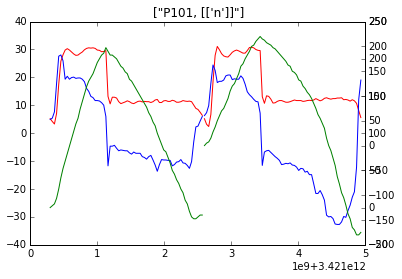

In [ ]:
def plotter(x):
    
    ax1.plot(x['data_frame:Time'], x['data_frame:Paw'], 'r')
    ax1.plot(x['data_frame:Time'], x['data_frame:Flow'], 'b')
    
    ax2 = ax1.twinx()
    ax2.plot(x['data_frame:Time'], x['data_frame:Volume'], 'g')
    
    
for i in range(0, len(breath_df), 2):
    #col = ['data_frame:Paw', 'data_frame:Flow', 'data_frame:Volume']  
    fig, ax1 = plt.subplots()
    breath_df[i:i+2].apply(plotter, axis=1)
    plt.title(breath_df[i:i+1]['patientID'].values + ', ' + str(breath_df[i:i+1]['analysis'].values))
    plt.show()


In [10]:
breath_df['analysis'].count()

2388

In [11]:
breath_df['ds'] = breath_df['analysis'].apply(lambda x: 1 if 'd' in x else 0 )
breath_df['f'] = breath_df['analysis'].apply(lambda x: 1 if 'f' in x else 0 )
breath_df['i'] = breath_df['analysis'].apply(lambda x: 1 if 'i' in x else 0 )

gp = breath_df.groupby('ds')

In [12]:
gp.describe()

breath_number  characteristics:breath_time  \
ds                                                     
0  count    1984.000000                  1984.000000   
   mean     5193.746976                     2.701858   
   std      5114.756573                     0.764556   
   min         1.000000                     0.544000   
   25%      1589.750000                     2.336000   
   50%      3480.500000                     2.944000   
   75%      6750.750000                     3.168000   
   max     22543.000000                     4.352000   
1  count     404.000000                   404.000000   
   mean     6216.056931                     1.049030   
   std      6130.871592                     0.181558   
   min        11.000000                     0.704000   
   25%      1549.750000                     0.960000   
   50%      3639.000000                     0.992000   
   75%      8727.750000                     1.152000   
   max     22413.000000                     2.432000   

          characteristics:end_insp_vol  characteristics:exp_time  \
ds                                                                 
0  count                   1984.000000               1984.000000   
   mean                     -53.477823                  1.836894   
   std                      208.255143                  0.713504   
   min                    -1210.000000                  0.032000   
   25%                      -97.500000                  1.472000   
   50%                        5.000000                  2.112000   
   75%                       42.500000                  2.368000   
   max                     1035.000000                  3.456000   
1  count                    404.000000                404.000000   
   mean                     336.751238                  0.284277   
   std                      152.347062                  0.129672   
   min                     -117.500000                  0.096000   
   25%                      256.875000                  0.224000   
   50%                      355.000000                  0.224000   
   75%                      430.000000                  0.320000   
   max                      840.000000                  1.376000   

          characteristics:insp_time  characteristics:max_vol  \
ds                                                             
0  count                1984.000000              1984.000000   
   mean                    0.864965               382.225302   
   std                     0.186345               193.351467   
   min                     0.000000               -10.000000   
   25%                     0.768000               292.500000   
   50%                     0.800000               380.000000   
   75%                     1.024000               465.000000   
   max                     1.930000              1105.000000   
1  count                 404.000000               404.000000   
   mean                    0.764752               392.048267   
   std                     0.121239               141.627910   
   min                     0.512000                50.000000   
   25%                     0.704000               310.000000   
   50%                     0.768000               405.000000   
   75%                     0.768000               475.625000   
   max                     1.184000               925.000000   

          characteristics:min_exp_flow  characteristics:min_vol  \
ds                                                                
0  count                   1984.000000              1984.000000   
   mean                      43.572807               -93.913810   
   std                       20.384588               165.748519   
   min                      -20.100000             -1210.000000   
   25%                       32.250000               -97.500000   
   50%                       40.500000                -5.000000   
   75%                       55.500000                 0.000000   
   max              

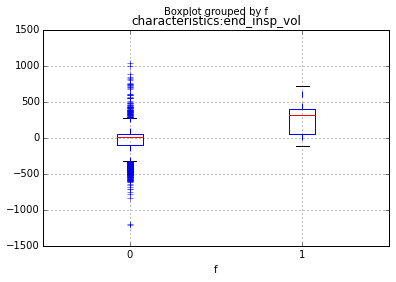

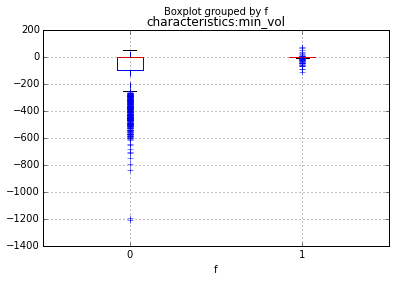

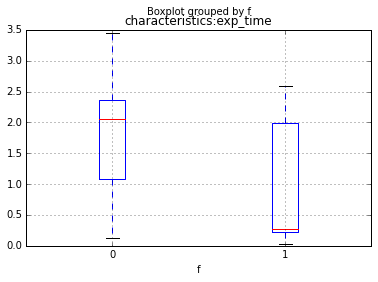

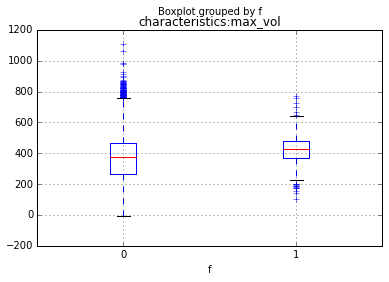

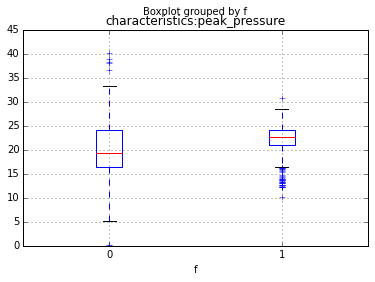

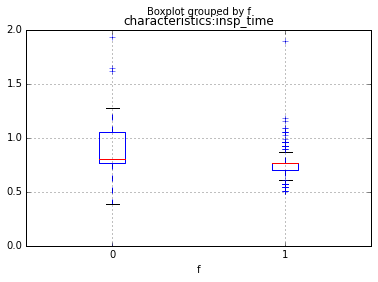

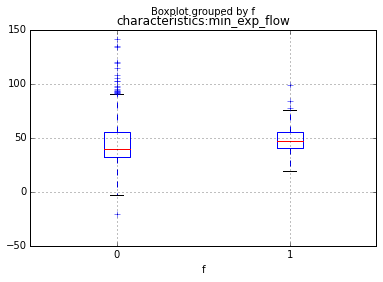

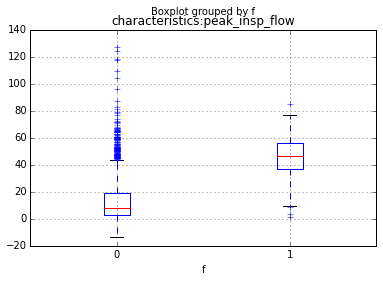

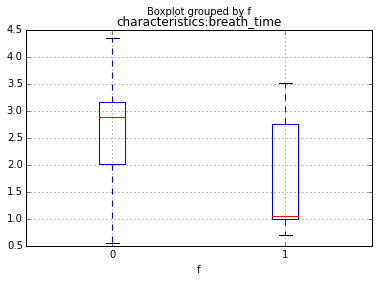

In [13]:
for x in ['characteristics:end_insp_vol', 'characteristics:min_vol', 'characteristics:exp_time', 'characteristics:max_vol', 'characteristics:peak_pressure', 'characteristics:insp_time', 'characteristics:min_exp_flow', 'characteristics:peak_insp_flow', 'characteristics:breath_time']:
    breath_df.boxplot(column=[x], by='f')

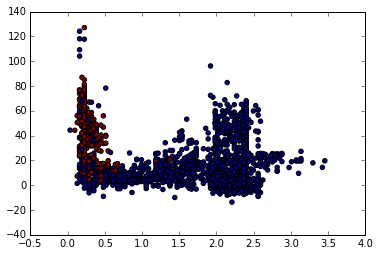

In [14]:
plt.scatter(breath_df['characteristics:exp_time'], breath_df['characteristics:peak_insp_flow'], c=breath_df['ds'])

In [24]:
from sklearn.svm import SVC

In [25]:
x = breath_df[['characteristics:exp_time', 'characteristics:peak_insp_flow', 'characteristics:end_insp_vol', 'characteristics:breath_time']]

In [26]:
y = breath_df['ds']

In [27]:
clf = SVC()

In [28]:
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
clf.score(x,y)

0.98953098827470687

In [36]:
clf.predict([0.2, 20, 300, 1])

array([0], dtype=int64)

In [37]:
from sklearn.externals import joblib
joblib.dump(clf, 'e:\DS_SVM.pkl')

['e:\\DS_SVM.pkl',
 'e:\\DS_SVM.pkl_01.npy',
 'e:\\DS_SVM.pkl_02.npy',
 'e:\\DS_SVM.pkl_03.npy',
 'e:\\DS_SVM.pkl_04.npy',
 'e:\\DS_SVM.pkl_05.npy',
 'e:\\DS_SVM.pkl_06.npy',
 'e:\\DS_SVM.pkl_07.npy',
 'e:\\DS_SVM.pkl_08.npy',
 'e:\\DS_SVM.pkl_09.npy',
 'e:\\DS_SVM.pkl_10.npy',
 'e:\\DS_SVM.pkl_11.npy']

In [32]:
breath_df['predict'] = clf.predict(x)

In [35]:
breath_df[['ds', 'predict']]

,ds,predict
542,0,0
1738,0,0
0,1,1
1199,0,0
1,1,1
1200,0,0
2,1,1
1201,0,0
3,1,1
1202,0,0
